## Imports 

In [303]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.datasets import reuters
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
 
from keras.models import model_from_json
    
from keras import backend as K
K.set_image_dim_ordering('th')



### Read the train and test Data 
#### Image size -> Example size (32*32)
#### Data size (13440  Train and Validation) and (3360 Test)

In [304]:
#Read the training and test Data using any library from the folder or the csv file

# load Train and Test Data 

# Train ===========================
x_train_file = open('Arabic-Handwritten-Characters-Dataset-master\csvTrainImages 13440x1024.csv', 'rb')
x_train_data = np.loadtxt(x_train_file, delimiter=",")  # shape (13440,1024)



y_train_file = open('Arabic-Handwritten-Characters-Dataset-master\csvTrainLabel 13440x1.csv', 'rb')
y_train_data = np.loadtxt(y_train_file, delimiter=",") # shape (13440,)


# Test ===========================
x_test_file = open('Arabic-Handwritten-Characters-Dataset-master\csvTestImages 3360x1024.csv', 'rb')
x_test_data = np.loadtxt(x_test_file, delimiter=",") # shape (3360,1024)


y_test_file = open('Arabic-Handwritten-Characters-Dataset-master\csvTestLabel 3360x1.csv', 'rb')
y_test_data = np.loadtxt(y_test_file, delimiter=",") # shape (3360,)

x_train_img = x_train_data.reshape(x_train_data.shape[0], 32, 32).astype('float32') 
x_test_img = x_test_data.reshape(x_test_data.shape[0], 32, 32).astype('float32') 

x_train_img = np.rot90(x_train_img, 3, (1,2)) # Rotate by 290 deg 
x_test_img = np.rot90(x_test_img, 3, (1,2)) # Rotate by 290 deg 





[  0.   0.   0.   0.   0.   0.   0.   0.  58. 141. 234. 255. 255. 236.
 178. 139. 132.  97.  33.  20.  17.  15.  14. 105. 255. 162.   0.   0.
   0.   0.   0.   0.]


## Check sample of the training and testing images

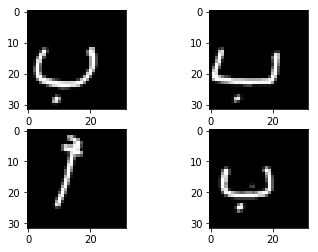

In [305]:
plt.subplot(221)
plt.imshow(x_train_img[10], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train_img[11], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_test_img[0], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_test_img[3], cmap=plt.get_cmap('gray'))

In [11]:
print(y_test_data[3])

2.0


## Pre-Processing

In [12]:
# Reshape to be suitable for the cnn
x_train = x_train_img.reshape(x_train_img.shape[0], 1, 32, 32).astype('float32')
x_test = x_test_img.reshape(x_test_img.shape[0], 1, 32, 32).astype('float32')


# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255



# one hot encode outputs
y_train = np_utils.to_categorical(y_train_data)
y_test = np_utils.to_categorical(y_test_data)
num_classes = y_test.shape[1]

print(x_train.shape)


(13440, 1, 32, 32)


## CNN Model , Compile , Fit, and Evaluate

In [13]:
#Design the CNN layers here
def cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(80, (5, 5), input_shape=(1, 32, 32), activation='relu'  , padding='valid')  )    
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2 ))
    
    model.add(Conv2D(64, (5, 5), activation='relu', padding='valid'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2 ))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5)) # don't use drop out in CNN Layers
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [14]:
# Compile, fit and validate your model 
# use 0.1 of the training data only to validate your model accuracy using this function 
# model.fit(X_train, y_train, validation_split=.1, epochs=10, batch_size=200,shuffle=True, verbose=1)
# feel free to change the epochs and batch_size numbers


# build the model
model = cnn_model()


model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 80, 28, 28)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 80, 14, 14)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 10, 10)        128064    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 10, 10)        40        
_________________________________________________________________
activation_1 (Activation)    (None, 64, 10, 10)        0         
_________________________________________________________________
max_pooling2d_2 (MaxP

In [15]:

# Fit the model
history = model.fit(x_train, y_train, validation_split=.1, epochs=30, batch_size=300, verbose=1)


Instructions for updating:
Use tf.cast instead.
Train on 12096 samples, validate on 1344 samples
Epoch 1/30
12096/12096 [==============================] - 82s 7ms/step - loss: 2.9346 - acc: 0.1537 - val_loss: 2.3103 - val_acc: 0.3646
Epoch 2/30
12096/12096 [==============================] - 78s 6ms/step - loss: 1.9805 - acc: 0.3713 - val_loss: 1.4331 - val_acc: 0.5781
Epoch 3/30
12096/12096 [==============================] - 95s 8ms/step - loss: 1.3604 - acc: 0.5437 - val_loss: 0.9315 - val_acc: 0.7195
Epoch 4/30
12096/12096 [==============================] - 103s 9ms/step - loss: 0.9954 - acc: 0.6670 - val_loss: 0.7069 - val_acc: 0.7738
Epoch 5/30
12096/12096 [==============================] - 93s 8ms/step - loss: 0.7722 - acc: 0.7402 - val_loss: 0.5581 - val_acc: 0.8251
Epoch 6/30
12096/12096 [==============================] - 90s 7ms/step - loss: 0.6376 - acc: 0.7864 - val_loss: 0.4973 - val_acc: 0.8341
Epoch 7/30
12096/12096 [==============================] - 83s 7ms/step - loss: 0

## Visualize the train and validation Error Curves

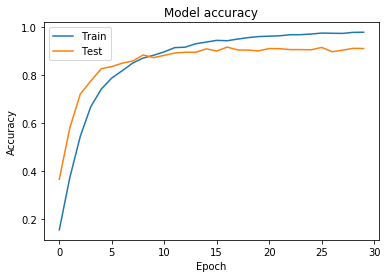

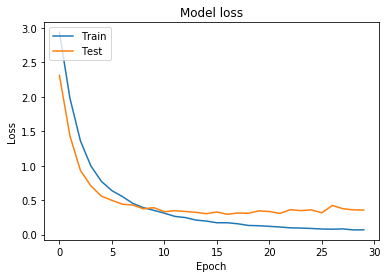

In [16]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## ِApply Early Stopping, stop training at epoch no 10

In [358]:
# Re build the model
model = cnn_model()

# Fit the model again
history = model.fit(x_train, y_train, validation_split=.1, epochs=10, batch_size=300, verbose=1)


Train on 12096 samples, validate on 1344 samples
Epoch 1/10
12096/12096 [==============================] - 89s 7ms/step - loss: 3.0252 - acc: 0.1441 - val_loss: 2.3753 - val_acc: 0.3155
Epoch 2/10
12096/12096 [==============================] - 85s 7ms/step - loss: 2.0376 - acc: 0.3657 - val_loss: 1.4283 - val_acc: 0.6034
Epoch 3/10
12096/12096 [==============================] - 88s 7ms/step - loss: 1.3754 - acc: 0.5481 - val_loss: 0.9265 - val_acc: 0.7113
Epoch 4/10
12096/12096 [==============================] - 92s 8ms/step - loss: 0.9903 - acc: 0.6644 - val_loss: 0.6952 - val_acc: 0.7827
Epoch 5/10
12096/12096 [==============================] - 83s 7ms/step - loss: 0.7459 - acc: 0.7479 - val_loss: 0.5526 - val_acc: 0.8207
Epoch 6/10
12096/12096 [==============================] - 84s 7ms/step - loss: 0.6055 - acc: 0.7970 - val_loss: 0.4440 - val_acc: 0.8646
Epoch 7/10
12096/12096 [==============================] - 84s 7ms/step - loss: 0.4975 - acc: 0.8303 - val_loss: 0.4335 - val_acc:

In [234]:

scores = model.evaluate(x_test, y_test, verbose=0)
print("CNN Error Rate: %.2f%%" % (100 - scores[1]*100))

# We will compare the three arch with the validation accuracy 
# name our jupyter file with your first name under score mode
# Y_model -> Youssef
# N_model -> Nabeil
# M_model -> Menna

# create a branch with your name and push on it

# >>>>>>>>>>>>> Don't measure your performance on the test data to avoid overfitting  <<<<<<<<<<<<<<<<<<<<

# after choosing the best Arch we will measure it's performance on the test set


CNN Error Rate: 8.10%


## Predict some images with our model and check there correct label

In [44]:
x_test[index:index+1].shape

(1, 1, 32, 32)

[16]


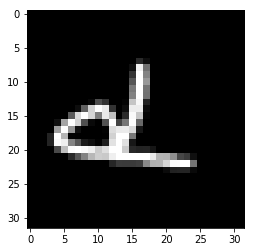

In [78]:
index = 30 # of the sample to be tested

y = model.predict_classes(x_test[index:index+1])
plt.imshow(x_test_img[index], cmap=plt.get_cmap('gray'))
print(y)

## Save the model weights

In [116]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


## Start running cells from here 

In [287]:
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


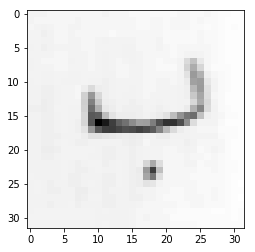

In [379]:
img = cv2.imread('10.png',1)

# Convert to Gray
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# resize image
resized = cv2.resize(img, (32,32), interpolation = cv2.INTER_AREA)

plt.imshow(resized, cmap=plt.get_cmap('gray'))


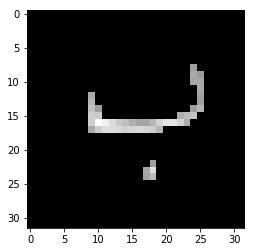

In [380]:
#pre-processing

#square_kernal=np.ones((2,2),np.uint8)

#test_youssef = cv2.adaptiveThreshold(resized,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,3,2)

#test_youssef = cv2.erode(test_youssef,square_kernal,iterations = 1)
#plt.imshow(test_youssef, cmap=plt.get_cmap('gray'))


# This part to convert background to black only
new = np.invert(resized)
mask = new > (120)
test_youssef = new * mask

plt.imshow(test_youssef, cmap=plt.get_cmap('gray'))


In [381]:
test_youssef = test_youssef.reshape(1,1, 32, 32).astype('float32')
x = model.predict_classes(test_youssef)
print(x)

[2]
